In [1]:
!pip install projectq

In [2]:
import projectq.setups.ionq
from projectq import MainEngine
from projectq.backends import IonQBackend
from projectq.libs.hist import histogram
from projectq.ops import H, Measure
import matplotlib.pyplot as plt

from getpass import getpass

# get your API key from https://cloud.ionq.com/settings/keys
token = getpass('Enter your IonQ API key: ')
device = 'ionq_simulator'

In [3]:
backend = IonQBackend(
    token=token,
    use_hardware=True,
    num_runs=1024,
    verbose=False,
    device=device,
)
compiler_engines = projectq.setups.ionq.get_engine_list(
    token=token,
    device=device,
)
eng = MainEngine(backend, engine_list=compiler_engines)

In [4]:
qubit = eng.allocate_qubit()  # allocate a quantum register with 1 qubit

H | qubit  # apply a Hadamard gate
Measure | qubit  # measure the qubit

eng.flush()  # flush all gates (and execute measurements)

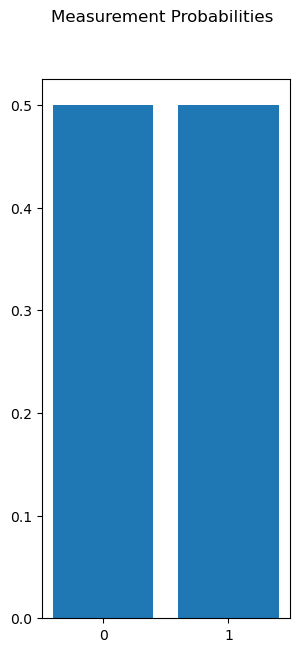

In [5]:
histogram(eng.backend, qubit)
plt.show()